# Kernel SVM

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset


In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x=dataset.iloc[:,2:4].values
y=dataset.iloc[:,4].values

# Splitting the dataset into the Training set and Test set


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# Feature Scaling


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()

In [8]:
x_train=sc.fit_transform(x_train)

/home/yaseen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yaseen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
x_test=sc.transform(x_test)

/home/yaseen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting Kernel SVM to the Training set


In [10]:
from sklearn.svm import SVC

In [11]:
classifier=SVC(kernel='rbf')

In [12]:
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Predicting the Test set results


In [13]:
y_pred=classifier.predict(x_test)

# Making the Confusion Matrix


In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,y_pred)

array([[46,  5],
       [ 3, 26]])

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

0.9

# training set visualization

In [18]:
from matplotlib.colors import ListedColormap

In [21]:
x_set,y_set=x_train,y_train

In [22]:
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


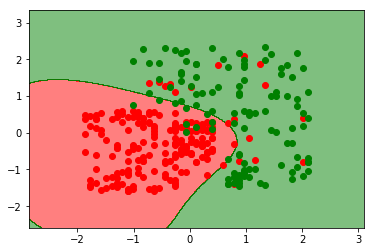

In [44]:
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.5,cmap=ListedColormap(("red","green")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(("red","green"))(i),label=j)

# testing set visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


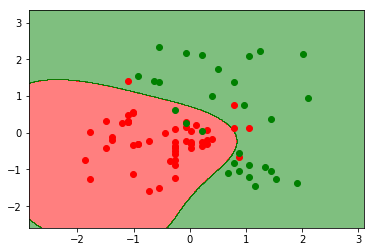

In [46]:

from matplotlib.colors import ListedColormap

x_set,y_set=x_test,y_test

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),

                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.5,cmap=ListedColormap(("red","green")))

plt.xlim(x1.min(),x1.max())

plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):

    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],

                c=ListedColormap(("red","green"))(i),label=j)